In [1]:
#inspiration: https://analytics4all.org/2016/05/11/python-logistic-regression/

# Data preparation:

In [1]:
import pandas as pd   #to use read_csv(), crosstab()
import numpy as np    #to use exponentiation : exp()
import statsmodels.api as sm  #to use the Logit()

In [34]:
#import the dataset
mydata=pd.read_csv('pima.csv',sep=",")

In [35]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pregnancies                   768 non-null    int64  
 1   plasma glucose concentration  768 non-null    int64  
 2   diastolic blood pressure      768 non-null    int64  
 3   triceps skinfold thickness    768 non-null    int64  
 4   insulin                       768 non-null    int64  
 5   body mass index               768 non-null    float64
 6   diabetes pedigree function    768 non-null    float64
 7   age                           768 non-null    int64  
 8   diabetic                      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
#take a look at the dataset
print(mydata.shape) #768*9

(768, 9)


In [37]:
mydata.columns

Index(['pregnancies', 'plasma glucose concentration',
       'diastolic blood pressure', 'triceps skinfold thickness', 'insulin',
       'body mass index', 'diabetes pedigree function', 'age', 'diabetic'],
      dtype='object')

In [38]:
mydata.columns=['NPG','PGL','DIA','TSF','INS','BMI','DPF','AGE','Diabet']

In [39]:
mydata.head() 
#Predictor variables:
#NPG= number of times pregnant
#PGL= Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
#DIA= Diastolic blood pressure (mm Hg) 
#TSF=Triceps skin fold thickness (mm) 
#INS= 2-Hour serum insulin (mu U/ml) 
#BMI=Body mass index (weight in kg/(height in m)^2) 
#DPF= Diabetes pedigree function 
#AGE= Age (years) 

#Output variable:
#Diabet= 0/1


,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabet
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
#summarize the data
print(mydata.describe())

              NPG         PGL         DIA         TSF         INS         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              DPF         AGE      Diabet  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [41]:
#find the standard deviation of each column
print(mydata.std())

NPG         3.369578
PGL        31.972618
DIA        19.355807
TSF        15.952218
INS       115.244002
BMI         7.884160
DPF         0.331329
AGE        11.760232
Diabet      0.476951
dtype: float64


# Data visualization:

In [42]:
import pylab as pyl #for generating plots: show()

In [43]:
import matplotlib.pyplot as plt #for tight_layout()

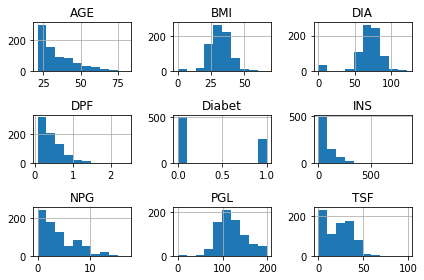

In [44]:
#plot histograms of all the 9 columns
mydata.hist()


plt.tight_layout() #tight_layout(): adjust spacing between subplots to minimize the overlaps.
pyl.show()         #show the histograms

# Create placeholder for y-intercept

In [45]:
#explicitly create a placeholder for y-intercept: b0
mydata['int']=1
mydata.head()

,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabet,int
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


# Model creation

In [46]:
#The Logistic Regression model gives us coefficients to put in the formula:
# y= b0 + b1*NPG + + b2*PGL+ b3*DIA + b4*TSF + b5*INS + b6*BMI + b7*DPF + b8*AGE


In [47]:
#declare the independent variables, including the intercept
#create the LogR model
#fit the model

independentVar= ['NPG','PGL','DIA','TSF','INS','BMI','DPF','AGE','int']
model1= sm.Logit(mydata['Diabet'], mydata[independentVar])
answer= model1.fit()



Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


In [48]:
#summarize the model
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Diabet   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Mon, 12 Oct 2020   Pseudo R-squ.:                  0.2718
Time:                        20:41:02   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NPG            0.1232      0.032      3.840      0.000       0.060       0.186
PGL            0.0352      0.004      9.481      0.000       0.028       0.042
DIA           -0.0133      0.005     -2.540      0.011      -0.024      -0.003
TSF            0.0006      0.007      0.090      0.929      -0.013       0.014
INS           -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI            0.0897      0.015      5.945      0.000       0.060       0.119
DPF            0.9452      0.299      3.160      0.002       0.359       1.531
AGE            0.0149      0.009      1.593      0.111      -0.003       0.033
int           -8.4047      0.717    -11.728      0.000      -9.809      -7.000
==============================================================================
"""

In [49]:
#extracting the coefficients from the above summary
answer.params

NPG    0.123182
PGL    0.035164
DIA   -0.013296
TSF    0.000619
INS   -0.001192
BMI    0.089701
DPF    0.945180
AGE    0.014869
int   -8.404696
dtype: float64

In [50]:
#define a function 'y' that solves
#the eqn:  y= b0 + b1*NPG + + b2*PGL+ b3*DIA + b4*TSF + b5*INS + b6*BMI + b7*DPF + b8*AGE;

# where the coefficient's indexes from answer.params to use in the above function, are:
#NPG    0.123182...[0]
#PGL    0.035164...[1]
#DIA   -0.013296...[2]
#TSF    0.000619...[3]
#INS   -0.001192...[4]
#BMI    0.089701...[5]
#DPF    0.945180...[6]
#AGE    0.014869...[7]
#int   -8.404696...[8]

coeffs=answer.params
def y(int,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE):
    return coeffs[8]+ coeffs[0]*NPG + coeffs[1]*PGL + coeffs[2]*DIA + coeffs[3]*TSF + coeffs[4]*INS + coeffs[5]*BMI + coeffs[6]*DPF + coeffs[7]*AGE
    

# Test with a random sample

In [51]:
# test for a patient with NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE values of 
# 8,196,30,38,230,45,0.180,34 resp.
y1= y(int, 8,196,30,38,230,45,0.180,34)
print(y1)




3.5356357212444225


In [52]:
#above, y1= 3.535 is the log-odds of having diabetes to that of not having diabetes
# Thus, to convert y1 into a probability 'p', plug in the exponent of y1 into the formula e^y1 / (1 + e^y1)

np.exp(1) #checking the working of exp()

2.718281828459045

In [53]:
p= np.exp(y1)/ (1+ np.exp(y1)) #formula e^y1 / (1 + e^y1)
print(p)
                

0.9716848828743604


In [54]:
# Thus, there is a 97% chance of the above patient getting diabetes (ie dependent variable y=1)